# Plot temperature response over time

This notebook does the same as [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) except that it varies the ECS parameter and outputs a table of changes in temperature with respect to some reference year (defined below).  

In [1]:
from ar6_ch6_rcmipfigs.constants import BASE_DIR
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, INPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DT_OUTPUT = RESULTS_DIR / 'tables'/'table_sens_dT_cs.csv'

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


**Output table found in:**

In [2]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables/table_sens_dT_cs.csv


### General about computing $\Delta T$: 

We compute the change in GSAT temperature ($\Delta T$) from the effective radiative forcing (ERF) estimated from [Smith 2020](https://zenodo.org/record/3973015), by integrating with the impulse response function (IRF(t-t'))
#todo: check for ref for IRF
(Geoffroy at al 2013).

For any forcing agent $x$, with estimated ERF$_x$, the change in temperature $\Delta T$ is calculated as:


\begin{align*} 
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

#### The Impulse response function (IRF):
In these calculations we use:
\begin{align*}
IRF(t) = \frac{q_1}{d_1} \exp\Big(\frac{-t}{d_1}\Big) + \frac{q_2}{d_2} \exp\Big(\frac{-t}{d_2}\Big)
\end{align*}

Where the constants, $q_i$ and $d_i$ are from XXXXXX????

## Input data:
See [README.md](../../README.md)

# Code + figures

In [3]:
import pandas as pd
import xarray as xr
fn_IRF_constants = INPUT_DATA_DIR/'irf_from_2xCO2_2020_12_02_050025-1.csv'
irf_consts = pd.read_csv(fn_IRF_constants).set_index('id')

ld1 = 'd1 (yr)'
ld2 = 'd2 (yr)'
lq1 = 'q1 (K / (W / m^2))'
lq2 = 'q2 (K / (W / m^2))'
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'
irf_consts#[d1]

,C (W yr / m^2 / K),C_d (W yr / m^2 / K),alpha (W / m^2 / K),eta (dimensionless),kappa (W / m^2 / K),d1 (yr),d2 (yr),q1 (K / (W / m^2)),q2 (K / (W / m^2)),efficacy (dimensionless),ecs (K),tcr (K),rf2xCO2 (W / m^2)
id,,,,,,,,,,,,,
median,18.882199,74.696905,1.326450,1.842415,0.245947,10.514430,411.184413,0.551673,0.202220,1.842415,2.956595,1.902808,3.921774
5th percentile,13.863160,71.008211,1.661241,1.621780,0.362412,6.112719,267.486167,0.437167,0.164793,1.621780,2.037291,1.417367,3.384431
95th percentile,20.094672,127.347922,0.983305,1.498099,0.362468,12.988083,552.802552,0.637427,0.379552,1.498099,4.519303,2.411874,4.443852
ensemble member 0,14.376108,181.972962,1.140837,0.623533,0.614109,9.357974,399.022327,0.645521,0.231028,0.623533,3.622535,2.390378,4.132722
ensemble member 2,9.213528,145.859092,1.552934,1.134904,0.587564,4.129695,356.642686,0.445928,0.198014,1.134904,2.134403,1.451264,3.314588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensemble member 596,19.096039,120.353129,1.211832,0.940455,0.412653,11.814680,389.001769,0.612230,0.212967,0.940455,3.256443,2.080608,3.946262
ensemble member 594,9.550309,61.534455,2.145485,2.176843,0.282746,3.446667,281.070348,0.359590,0.106505,2.176843,2.046529,1.554830,4.390797
ensemble member 595,10.014547,81.151740,0.676789,2.504343,0.204552,8.345005,703.468878,0.825554,0.652012,2.504343,5.191214,2.665050,3.513355


In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, INPUT_DATA_DIR, RESULTS_DIR
PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
 
PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables'/'table_sens_dT_cs.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'

**Output table found in:**

In [5]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP.nc


## Imports:

In [6]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import os
import re
from pathlib import Path
import pandas as pd
import tqdm
from scmdata import df_append, ScmDataFrame
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [7]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

In [8]:
IRFconstants = [perc5, median, perc95]
#{'ECS = 2K':0.526, 'ECS = 3.4K':0.884, 'ECS = 5K': 1.136 }

Year to integrate from and to:

In [9]:
first_y ='1850'
last_y = '2100'

**Set reference year for temperature change:**

In [10]:
ref_year = '2021'

**Years to output change in**

In [11]:
years= ['2040', '2100']

## IRF:

In [12]:

def IRF(t, d1, q1, d2, q2):
    """
    Returns the IRF function for:
    :param q2:
    :param d2:
    :param q1:
    :param d1:
    :param t: Time in years
    :return:
    IRF
    """
    irf = q1/d1*np.exp(-t/d1) + q2/d2*np.exp(-t/d2)
    return irf
        #l * (alpha1 * np.exp(-t / tau1) + alpha2 * np.exp(-t / tau2))

## ERF:
Read ERF from file

### Define variables to look at:

In [13]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-radiation_interactions',
    'aerosol-cloud_interactions',
    'aerosol-total',
    'o3',
    #'F-Gases|HFC',
    'bc_on_snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = ['ssp534-over', 'ssp119', 'ssp460', 'ssp585', 'ssp370', 
                'ssp370-lowNTCF-aerchemmip', 'ssp126', 'ssp245', 'ssp434',
                'ssp370-lowNTCF-gidden'
               ]

### Open dataset:

In [14]:
ds = xr.open_dataset(PATH_DATASET).sel(year=slice(1700,2200)) # we need only years until 1700
da_ERF = ds['ERF']

#ds['time'] = \
#ds['year'].to_pandas().index.map('{}-01-01'.format)
ds['time'] = pd.to_datetime(ds['year'].to_pandas().index.map(str), format = '%Y')

# delta_t is 1 (year)
ds['delta_t'] = xr.DataArray(np.ones(len(ds['year'])), dims='year', coords={'year': ds['year']})

## Integrate:
The code below integrates the read in ERFs with the pre defined impulse response function (IRF).

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

In [15]:
name_deltaT = 'Delta T'


def new_varname(var, nname):
    """
    var:str
        Old variable of format varname|bla|bla
    nname:str
        name for the resulting variable, based on var
    Returns
    -------
    new variable name with nname|bla|bla
    """
    return nname #+ '|' + '|'.join(var.split('|')[1:])


def integrate_(i, var, nvar, ds, ds_DT, irf_consts):
    """
    
    Parameters
    ----------
    i:int
        the index for the integral
    var:str
        the name of the EFR variables to integrate
    nvar:str
        the name of output integrated value

    ds:xr.Dataset
        the ds with the input data
    ds_DT: xr.Dataset
        the output ds with the integrated results
    csfac: climate sensitivity factor (for IRF)
    Returns
    -------
    None
    
    """
    # lets create a ds that goes from 0 to i inclusive
    ds_short = ds[{'year': slice(0, i + 1)}].copy()
    # lets get the current year
    current_year = ds_short['year'][{'year': i}]#.dt.year
    # lets get a list of years
    years = ds_short['year']#.dt.year
    # lets get the year delta until current year(i)
    ds_short['end_year_delta'] = current_year - years

    # lets get the irf values from 0 until i
    d1 = irf_consts[ld1]
    d2 = irf_consts[ld2]
    q1 = irf_consts[lq1]
    q2 = irf_consts[lq2]

    ds_short['irf'] = IRF(
        ds_short['end_year_delta'] * ds_short['delta_t'], d1, q1, d2, q2)

    # lets do the famous integral
    ds_short['to_integrate'] = \
        ds_short[var] * \
        ds_short['irf'] * \
        ds_short['delta_t']

    # lets sum all the values up until i and set
    # this value at ds_DT
    # If whole array is null, set value to nan
    if np.all(ds_short['to_integrate'].isnull()):  # or last_null:
        _val = np.nan
    else:
        # 

        _ds_int = ds_short['to_integrate'].sum(['year'])
        # mask where last value is null (in order to not get intgral 
        _ds_m1 = ds_short['to_integrate'].isel(year=-1)
        # where no forcing data)
        _val = _ds_int.where(_ds_m1.notnull())
    # set value in dataframe:
    ds_DT[nvar][{'year': i}] = _val


def integrate_to_dT(ds, from_t, to_t, variables, irf_consts):
    """
    Integrate forcing to temperature change.

    :param ds: dataset containing the focings
    :param from_t: start year
    :param to_t: end year
    :param variables: variables to integrate
    :param csfac: climate sensitivity factor
    :return:
    """
    # slice dataset
    ds_sl = ds.sel(year=slice(from_t, to_t))
    len_time = len(ds_sl['year'])
    # lets create a result DS
    ds_DT = ds_sl.copy()

    # lets define the vars of the ds
    #vars = variables  # variables_erf_comp+ variables_erf_tot #['EFR']
    for var in variables:
        namevar = name_deltaT
        # set all values to zero for results dataarray:
        ds_DT[namevar] = ds_DT[var] * 0
        # Units Kelvin:
        ds_DT[namevar].attrs['unit'] = 'K'
        if 'unit' in ds_DT[namevar].coords:
            ds_DT[namevar].coords['unit'] = 'K'

    for i in range(len_time):
        # da = ds[var]
        if (i % 20) == 0:
            print('%s of %s done' % (i, len_time))
        for var in variables:
            namevar = new_varname(var, name_deltaT)  # 'Delta T|' + '|'.join(var.split('|')[1:])

            # print(var)
            integrate_(i, var, namevar, ds_sl, ds_DT, irf_consts)
    clear_output()
    fn ='DT_%s-%s.nc' % (from_t, to_t)
    fname = OUTPUT_DATA_DIR/ fn#'DT_%s-%s.nc' % (from_t, to_t)
    # save dataset.
    ds_DT.to_netcdf(fname)
    return ds_DT



## Compute $\Delta T$ with 3 different climate sensitivities

In [16]:
ds

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 17, year: 451)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2196 2197 2198 2199 2200
  * variable  (variable) object 'co2' 'ch4' 'n2o' ... 'total' 'aerosol-total'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 ...
    time      (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t   (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

In [17]:
irf_consts.loc[median][ld1]

10.514430258366302

In [18]:
dic_ds = {}
for key  in IRFconstants:
    dic_ds[key] = integrate_to_dT(ds, first_y, last_y,('ERF',), irf_consts.loc[key])

## check:

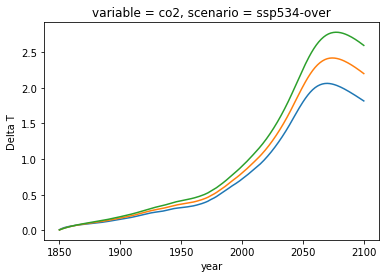

In [19]:
for per in IRFconstants:
    dic_ds[per].isel(scenario=0,variable=0)[name_deltaT].plot()

### Make datset with percentile as dimension:

In [20]:
ds_tmp = xr.Dataset( coords = dic_ds[key].coords)
ds_tmp
for key in IRFconstants:
    ds_tmp[key] = dic_ds[key]['Delta T']#.dims,dic_ds[key],)
ds['Delta T'] = ds_tmp.to_array('percentile')
ds.sel(year=slice(first_y,last_y)).to_netcdf(PATH_DT_OUTPUT)
#ds_DT.to_array('percentile')
#dic_ds[key]['Delta T']

## Table

### Setup table:

In [21]:

iterables = [list(IRFconstants), years]

def setup_table(scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    table = pd.DataFrame(columns=[var.split('|')[-1] for var in variables_all], index = _i).transpose()
    table.index.name=scenario_n
    return table

In [22]:
# Dicitonary of tables with different ESC:
scntab_dic = {}
for scn in scenarios_fl: 
    # Loop over scenrarios
    tab = setup_table(scenario_n=scn) # make table
    for var in variables_erf_comp:
        # Loop over variables
        tabvar = var.split('|')[-1]
        dtvar = new_varname(var, name_deltaT)
        for key in IRFconstants:
            # Loop over ESC parameters
            for year in years: 
                _tab_da = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year,ref_year)).squeeze()
                a = float(_tab_da.loc[var].squeeze().values)
                tab.loc[tabvar,(key,year)] = a
    scntab_dic[scn]=tab.copy()

In [23]:
from IPython.display import display

for key in scntab_dic:
    display(scntab_dic[key])

5th percentile                  median  \
                                         2040        2100        2040   
ssp534-over                                                             
ch4                                 0.0502845   -0.161842    0.054285   
aerosol-radiation_interactions      0.0332268  0.00273299   0.0521634   
aerosol-cloud_interactions          0.0918005    0.395854    0.106308   
aerosol-total                        0.125027    0.398587    0.158471   
o3                                  0.0360449   -0.125711   0.0411627   
bc_on_snow                        -0.00145081  -0.0420569  0.00128776   
total_anthropogenic                       NaN         NaN         NaN   
total                                     NaN         NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp534-over                                                           
ch4                             -0.179061       0.0615992  -0.184514  
aerosol-radiation_interactions  0.0265309       0.0609261  0.0390792  
aerosol-cloud_interactions       0.485863        0.111393   0.547777  
aerosol-total                    0.512394        0.172319   0.586856  
o3                               -0.14078       0.0484265  -0.145524  
bc_on_snow                     -0.0466311      0.00307025 -0.0498286  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                median  \
                                         2040       2100       2040   
ssp119                                                                
ch4                                -0.0254045  -0.155473 -0.0163725   
aerosol-radiation_interactions      0.0319751  0.0427556  0.0459705   
aerosol-cloud_interactions           0.243407   0.407076   0.261379   
aerosol-total                        0.275383   0.449832   0.307349   
o3                                 -0.0628997   -0.13436 -0.0568727   
bc_on_snow                         -0.0250234 -0.0401035 -0.0242413   
total_anthropogenic                       NaN        NaN        NaN   
total                                     NaN        NaN        NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp119                                                                
ch4                             -0.175986       -0.010017  -0.187175  
aerosol-radiation_interactions  0.0647586       0.0526836  0.0775451  
aerosol-cloud_interactions       0.502378        0.273369    0.57198  
aerosol-total                    0.567137        0.326053   0.649525  
o3                              -0.155998      -0.0530023  -0.168891  
bc_on_snow                     -0.0472314      -0.0241102 -0.0525955  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                  median  \
                                         2040       2100         2040   
ssp460                                                                  
ch4                                 0.0680191   0.149814    0.0734025   
aerosol-radiation_interactions      0.0186218 -0.0123107    0.0349466   
aerosol-cloud_interactions        -0.00523774   0.237102 -0.000231864   
aerosol-total                        0.013384   0.224791    0.0347148   
o3                                  0.0479243  0.0801712    0.0542729   
bc_on_snow                         0.00866112 -0.0254275    0.0121638   
total_anthropogenic                       NaN        NaN          NaN   
total                                     NaN        NaN          NaN   

                                           95th percentile             
                                      2100            2040       2100  
ssp460                                                                 
ch4                                0.18292       0.0818866   0.221821  
aerosol-radiation_interactions  0.00487887       0.0421185   0.011813  
aerosol-cloud_interactions        0.274119     -0.00251539   0.291286  
aerosol-total                     0.278998       0.0396031   0.303099  
o3                                0.103352       0.0624203   0.131687  
bc_on_snow                      -0.0247626       0.0146219 -0.0234878  
total_anthropogenic                    NaN             NaN        NaN  
total                                  NaN             NaN        NaN

5th percentile                  median  \
                                         2040        2100        2040   
ssp585                                                                  
ch4                                 0.0470759    0.125429   0.0510539   
aerosol-radiation_interactions      0.0332268 -0.00138294   0.0521634   
aerosol-cloud_interactions          0.0918005    0.264029    0.106308   
aerosol-total                        0.125027    0.262646    0.158471   
o3                                  0.0340149     0.04721   0.0391291   
bc_on_snow                        -0.00145081  -0.0304563  0.00128776   
total_anthropogenic                       NaN         NaN         NaN   
total                                     NaN         NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp585                                                                
ch4                              0.158425       0.0582397   0.195826  
aerosol-radiation_interactions  0.0196949       0.0609261  0.0299482  
aerosol-cloud_interactions       0.315727        0.111393   0.347377  
aerosol-total                    0.335422        0.172319   0.377325  
o3                              0.0726904       0.0463154   0.100719  
bc_on_snow                     -0.0313134      0.00307025 -0.0316733  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                  median  \
                                         2040        2100        2040   
ssp370                                                                  
ch4                                 0.0592677    0.233962   0.0640374   
aerosol-radiation_interactions      0.0172111  0.00857609   0.0312005   
aerosol-cloud_interactions         -0.0425545  0.00766542  -0.0408989   
aerosol-total                      -0.0253434   0.0162415 -0.00969837   
o3                                  0.0583605    0.203328    0.065226   
bc_on_snow                          0.0135175  0.00639851   0.0170489   
total_anthropogenic                       NaN         NaN         NaN   
total                                     NaN         NaN         NaN   

                                          95th percentile              
                                     2100            2040        2100  
ssp370                                                                 
ch4                              0.271914       0.0719627    0.316868  
aerosol-radiation_interactions  0.0265666        0.037392   0.0350205  
aerosol-cloud_interactions      0.0100489      -0.0459701 -0.00452218  
aerosol-total                   0.0366155     -0.00857806   0.0304983  
o3                               0.239377       0.0739882    0.281036  
bc_on_snow                      0.0116298       0.0197084   0.0172157  
total_anthropogenic                   NaN             NaN         NaN  
total                                 NaN             NaN         NaN

5th percentile                  median  \
                                         2040       2100         2040   
ssp370-lowNTCF-aerchemmip                                               
ch4                                 0.0592677   0.233962    0.0640374   
aerosol-radiation_interactions      0.0221988  0.0240283    0.0362921   
aerosol-cloud_interactions          0.0777886   0.303485    0.0793988   
aerosol-total                       0.0999874   0.327513     0.115691   
o3                                  0.0226424   0.134469    0.0290371   
bc_on_snow                         -0.0041165  -0.029611 -0.000664913   
total_anthropogenic                       NaN        NaN          NaN   
total                                     NaN        NaN          NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-aerchemmip                                             
ch4                              0.271914       0.0719627   0.316868  
aerosol-radiation_interactions  0.0463279       0.0427206  0.0584396  
aerosol-cloud_interactions       0.365326       0.0789412   0.405785  
aerosol-total                    0.411654        0.121662   0.464225  
o3                                0.15606       0.0362588   0.184251  
bc_on_snow                     -0.0318543      0.00128772 -0.0332024  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp126                                                                 
ch4                                -0.0163204   -0.14815 -0.00849878   
aerosol-radiation_interactions      0.0269604  0.0516694   0.0393704   
aerosol-cloud_interactions           0.202714   0.406803    0.218082   
aerosol-total                        0.229674   0.458473    0.257453   
o3                                 -0.0438257  -0.132899  -0.0384376   
bc_on_snow                         -0.0210558 -0.0380606  -0.0202656   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp126                                                                
ch4                             -0.165921     -0.00227224  -0.174432  
aerosol-radiation_interactions  0.0764173       0.0453229  0.0914811  
aerosol-cloud_interactions       0.499146        0.227679   0.565684  
aerosol-total                    0.575564        0.273002   0.657165  
o3                              -0.152282      -0.0341261  -0.162814  
bc_on_snow                     -0.0442574        -0.01999 -0.0487688  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp245                                                                 
ch4                                  0.032784  -0.011542   0.0389069   
aerosol-radiation_interactions     0.00840251  0.0120409   0.0228245   
aerosol-cloud_interactions          0.0547294   0.313579   0.0644069   
aerosol-total                       0.0631319    0.32562   0.0872314   
o3                                  0.0164406 -0.0439166   0.0225878   
bc_on_snow                        -0.00417501 -0.0363445 -0.00193021   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                           95th percentile              
                                      2100            2040        2100  
ssp245                                                                  
ch4                            -0.00623676       0.0463336  0.00735914  
aerosol-radiation_interactions   0.0319678        0.028911   0.0417284  
aerosol-cloud_interactions        0.377919       0.0663474    0.418003  
aerosol-total                     0.409887       0.0952584    0.459732  
o3                              -0.0436419       0.0294337  -0.0359435  
bc_on_snow                      -0.0399437    -0.000459466  -0.0421997  
total_anthropogenic                    NaN             NaN         NaN  
total                                  NaN             NaN         NaN

5th percentile                  median  \
                                         2040        2100        2040   
ssp434                                                                  
ch4                                 0.0436234    0.101564    0.050738   
aerosol-radiation_interactions      0.0305263  0.00802591   0.0464245   
aerosol-cloud_interactions          0.0541136    0.292477   0.0568979   
aerosol-total                       0.0846398    0.300503    0.103322   
o3                                  0.0243044   0.0391308   0.0321293   
bc_on_snow                         0.00232792   -0.029572  0.00603342   
total_anthropogenic                       NaN         NaN         NaN   
total                                     NaN         NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp434                                                                
ch4                              0.125413       0.0589813   0.155379  
aerosol-radiation_interactions  0.0293739        0.053879  0.0404374  
aerosol-cloud_interactions       0.343874       0.0559886   0.376226  
aerosol-total                    0.373248        0.109868   0.416664  
o3                              0.0550738       0.0399619  0.0758947  
bc_on_snow                     -0.0299382      0.00833258 -0.0298834  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                  median  \
                                         2040       2100         2040   
ssp370-lowNTCF-gidden                                                   
ch4                                -0.0267754  -0.122484   -0.0152393   
aerosol-radiation_interactions      0.0221988  0.0240283    0.0362921   
aerosol-cloud_interactions          0.0777886   0.303485    0.0793988   
aerosol-total                       0.0999874   0.327513     0.115691   
o3                                 -0.0301362 -0.0935843   -0.0197446   
bc_on_snow                         -0.0041165  -0.029611 -0.000664913   
total_anthropogenic                       NaN        NaN          NaN   
total                                     NaN        NaN          NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-gidden                                                 
ch4                             -0.142741     -0.00798296  -0.152856  
aerosol-radiation_interactions  0.0463279       0.0427206  0.0584396  
aerosol-cloud_interactions       0.365326       0.0789412   0.405785  
aerosol-total                    0.411654        0.121662   0.464225  
o3                              -0.107375       -0.012986  -0.113063  
bc_on_snow                     -0.0318543      0.00128772 -0.0332024  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

### Make table with all scenarios:

In [24]:
iterables = [list(IRFconstants), years]
iterables2 = [scenarios_fl, [var.split('|')[-1] for var in variables_all]]

def setup_table2():#scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    _r = pd.MultiIndex.from_product(iterables2, names=['', ''])
    
    table = pd.DataFrame(columns=_r, index = _i).transpose()
    return table



In [25]:
tab = setup_table2()#scenario_n=scn)

for scn in scenarios_fl:
    for var in variables_erf_comp:
        tabvar = var.split('|')[-1]
        dtvar = new_varname(var,name_deltaT)
        for key in IRFconstants:
            for year in years: 
                # compute difference between year and ref year
                _da_y = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year,year), variable=var)#.squeeze()
                _da_refy = dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year,ref_year), variable=var).squeeze()
                #_tab_da = dic_ds[key][dtvar].sel(scenario=scn, time=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, time=slice(ref_year,ref_year)).squeeze()
                _tab_da = _da_y - _da_refy

                tab.loc[(scn, tabvar), (key,year)] =_tab_da.squeeze().values#[0]



In [26]:
tab

5th percentile  \
                                                                        2040   
                                                                               
ssp534-over           ch4                                0.05028446234194078   
                      aerosol-radiation_interactions    0.033226804118937775   
                      aerosol-cloud_interactions         0.09180048030669352   
                      aerosol-total                      0.12502728442563138   
                      o3                                0.036044947293388196   
...                                                                      ...   
ssp370-lowNTCF-gidden aerosol-total                      0.09998741554703683   
                      o3                                -0.03013619984784696   
                      bc_on_snow                      -0.0041165028164683315   
                      total_anthropogenic                                NaN   
                      total                                              NaN   

                                                                             \
                                                                       2100   
                                                                              
ssp534-over           ch4                               -0.1618421334211757   
                      aerosol-radiation_interactions  0.0027329936181826886   
                      aerosol-cloud_interactions         0.3958541807706262   
                      aerosol-total                     0.39858717438880903   
                      o3                               -0.12571118156255068   
...                                                                     ...   
ssp370-lowNTCF-gidden aerosol-total                     0.32751294748378756   
                      o3                               -0.09358426334418651   
                      bc_on_snow                      -0.029610994481289465   
                      total_anthropogenic                               NaN   
                      total                                             NaN   

                                                                      median  \
                                                                        2040   
                                                                               
ssp534-over           ch4                               0.054284952457321345   
                      aerosol-radiation_interactions     0.05216341668109306   
                      aerosol-cloud_interactions         0.10630760717394694   
                      aerosol-total                      0.15847102385503997   
                      o3                                 0.04116268515078181   
...                                                                      ...   
ssp370-lowNTCF-gidden aerosol-total                      0.11569090775690716   
                      o3                               -0.019744649771694683   
                      bc_on_snow                      -0.0006649134199320089   
                      total_anthropogenic                                NaN   
                      total                                              NaN   

                                                                            \
                                                                      2100   
                                                                             
ssp534-over           ch4                             -0.17906079162626348   
                      aerosol-radiation_interactions   0.02653086612376257   
                      aerosol-cloud_interactions        0.4858628627183571   
                      aerosol-total                     0.5123937288421198   
                      o3                              -0.14078031404588942   
...                                                                    ...   
ssp370-lowN

## Save output

In [27]:
tab.to_csv(PATH_DT_TAB_OUTPUT)

In [28]:
PATH_DT_TAB_OUTPUT

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables/table_sens_dT_cs.csv')